### Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./tennis_stats.csv")

### Service Game Columns (Offensive)

* Aces: number of serves by the player where the receiver does not touch the ball
* DoubleFaults: number of times player missed both first and second serve attempts
* FirstServe: % of first-serve attempts made
* FirstServePointsWon: % of first-serve attempt points won by the player
* SecondServePointsWon: % of second-serve attempt points won by the player
* BreakPointsFaced: number of times where the receiver could have won service game of the player
* BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
* ServiceGamesPlayed: total number of games where the player served
* ServiceGamesWon: total number of games where the player served and won
* TotalServicePointsWon: % of points in games where the player served that they won

### Return Game Columns (Defensive)
* FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
* SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
* BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
* BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
* ReturnGamesPlayed: total number of games where the player’s opponent served
* ReturnGamesWon: total number of games where the player’s opponent served and the player won
* ReturnPointsWon: total number of points where the player’s opponent served and the player won
* TotalPointsWon: % of points won by the player

### Outcomes
* Wins: number of matches won in a year
* Losses: number of matches lost in a year
* Winnings: total winnings in USD($) in a year
* Ranking: ranking at the end of year

In [3]:
offensive = ['Aces',
             'DoubleFaults',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']

defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon',
             'TotalPointsWon']

outcomes = ['Wins',
            'Losses',
            'Winnings',
            'Ranking']

features = offensive + defensive

In [4]:
sns.set()

### Searching for correlations between columns

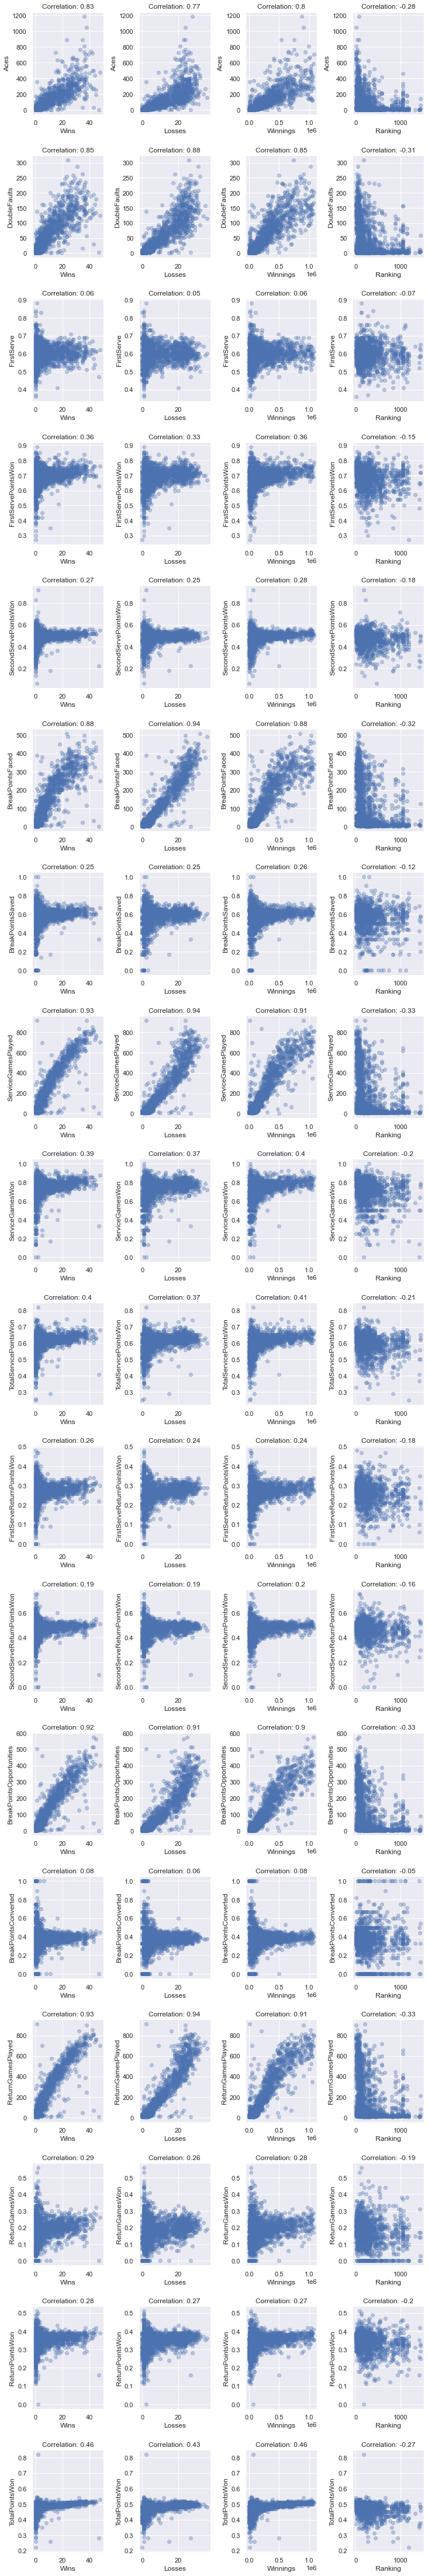

In [5]:
plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(df[outcomes[j]], df[features[i]], alpha=0.33)
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(df[features[i]].corr(df[outcomes[j]]), 2)}')
plt.show()

### Defining Our Linear_Regression method:

In [6]:
def linear_regression(features, outcome):
    X = df[features]
    y = df[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                        test_size=0.2, random_state=1)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print(f'Outcome: {outcome}')
    print(f'Train Score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}')
    coef = sorted(list(zip(features, reg.coef_)), key = lambda x: abs(x[1]), reverse=True)
    print('\tFeature coefficients:')
    for i in range(len(coef)):
        print(f'{coef[i][0]}: {coef[i][1]}')
    y_predicted = reg.predict(X_test)
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_predicted, alpha=0.33)
    plt.xlabel(f'{outcome}')
    plt.ylabel(f'Predicted {outcome}')
    plt.show()

### Linear regression: one feature

Outcome: Winnings
Train Score: 0.8408974330342829
Test Score: 0.8040898313870517
	Feature coefficients:
ServiceGamesPlayed: 1051.1907064949353


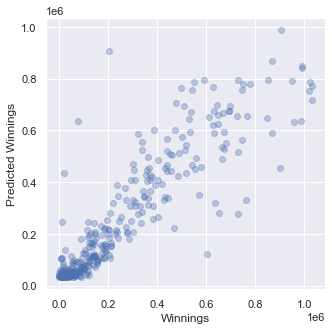

In [7]:
linear_regression(['ServiceGamesPlayed'], 'Winnings')

Outcome: Winnings
Train Score: 0.8186603337174664
Test Score: 0.7790768695631646
	Feature coefficients:
BreakPointsOpportunities: 1850.1168168699662


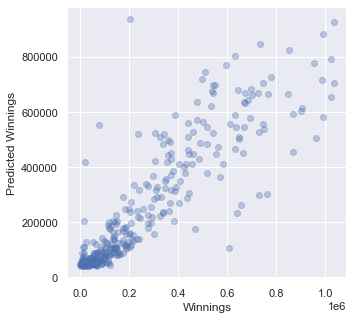

In [8]:
linear_regression(['BreakPointsOpportunities'], 'Winnings')

### Linear regression: two features

Outcome: Winnings
Train Score: 0.8409323982716942
Test Score: 0.8045167882641538
	Feature coefficients:
ServiceGamesPlayed: 1432.5293213809607
ReturnGamesPlayed: -381.15196087290826


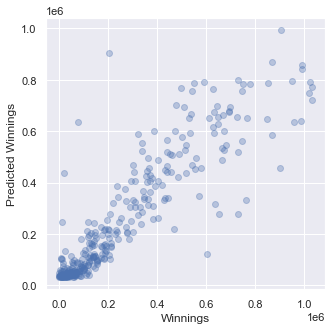

In [9]:
linear_regression(['ServiceGamesPlayed', 'ReturnGamesPlayed'], 'Winnings')

Outcome: Winnings
Train Score: 0.8420795582338332
Test Score: 0.8055953112285723
	Feature coefficients:
ServiceGamesPlayed: 861.6566975879791
BreakPointsOpportunities: 345.3162595977485


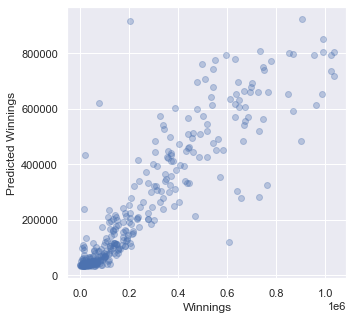

In [10]:
linear_regression(['ServiceGamesPlayed', 'BreakPointsOpportunities'], 'Winnings')

### Linear regression: multiple features

Outcome: Winnings
Train Score: 0.8484449500729736
Test Score: 0.8149220333672939
	Feature coefficients:
TotalServicePointsWon: -278867.3396989871
FirstServePointsWon: 204290.3005771456
TotalPointsWon: -173585.69800231612
SecondServePointsWon: 147073.26395422162
ReturnGamesWon: 82295.98252337814
FirstServeReturnPointsWon: -75425.80410395731
FirstServe: 46152.65740566416
BreakPointsSaved: 43302.731519527086
SecondServeReturnPointsWon: 8338.067657412843
BreakPointsConverted: -3544.3859008734958
ServiceGamesWon: -3342.776815712357
BreakPointsFaced: -831.8106407525896
ServiceGamesPlayed: 730.3576738762512
BreakPointsOpportunities: 639.957560096186
DoubleFaults: 602.1601754878476
ReturnGamesPlayed: 297.46106340986137
ReturnPointsWon: 239.20278974978584
Aces: -70.6824439456796


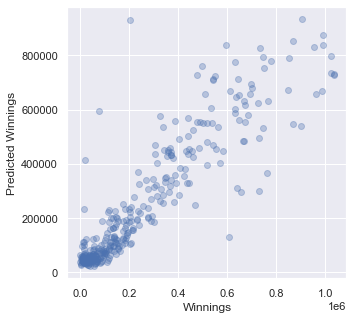

In [11]:
linear_regression(features, 'Winnings')

Outcome: Winnings
Train Score: 0.8455321854253499
Test Score: 0.8096099680121256
	Feature coefficients:
TotalServicePointsWon: -282319.1539466564
FirstServePointsWon: 161502.39007060352
SecondServePointsWon: 118428.74725687188
BreakPointsSaved: 36205.985629382485
ServiceGamesWon: -18541.59156474732
FirstServe: 16395.066919136083
ServiceGamesPlayed: 1438.1765047036147
BreakPointsFaced: -813.2236232176716
DoubleFaults: 626.9194423404504
Aces: -206.22979307870028


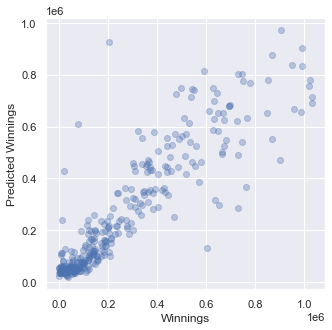

In [12]:
linear_regression(offensive, 'Winnings')

Outcome: Winnings
Train Score: 0.8419755717111046
Test Score: 0.8050842850412694
	Feature coefficients:
TotalPointsWon: 112665.4084348117
ReturnPointsWon: -91273.0580963171
FirstServeReturnPointsWon: -82585.19889332697
ReturnGamesWon: 57038.81637647527
SecondServeReturnPointsWon: 11620.57358162959
BreakPointsConverted: -9421.067857955835
ReturnGamesPlayed: 842.1944998008843
BreakPointsOpportunities: 371.8095115608175


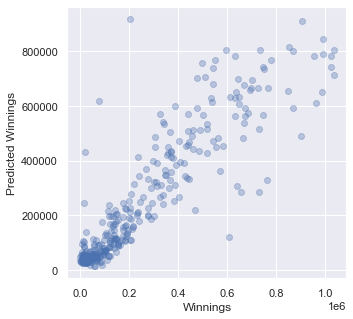

In [13]:
linear_regression(defensive, 'Winnings')